<a href="https://colab.research.google.com/github/jayarnim/project-Comparative_Analysis_of_Changes_in_Influence_of_Market_Demand_Determinants/blob/main/code/1_0_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,896 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and dire

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/2023-2_MachineLearning/Project/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/2023-2_MachineLearning/Project


In [2]:
from common import data, variable, sector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, SGDRegressor

In [3]:
# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 및 마이너스 기호 깨짐 조정
plt.rc('font', family = 'NanumGothic')
plt.rc('axes', unicode_minus = False)

# ALL

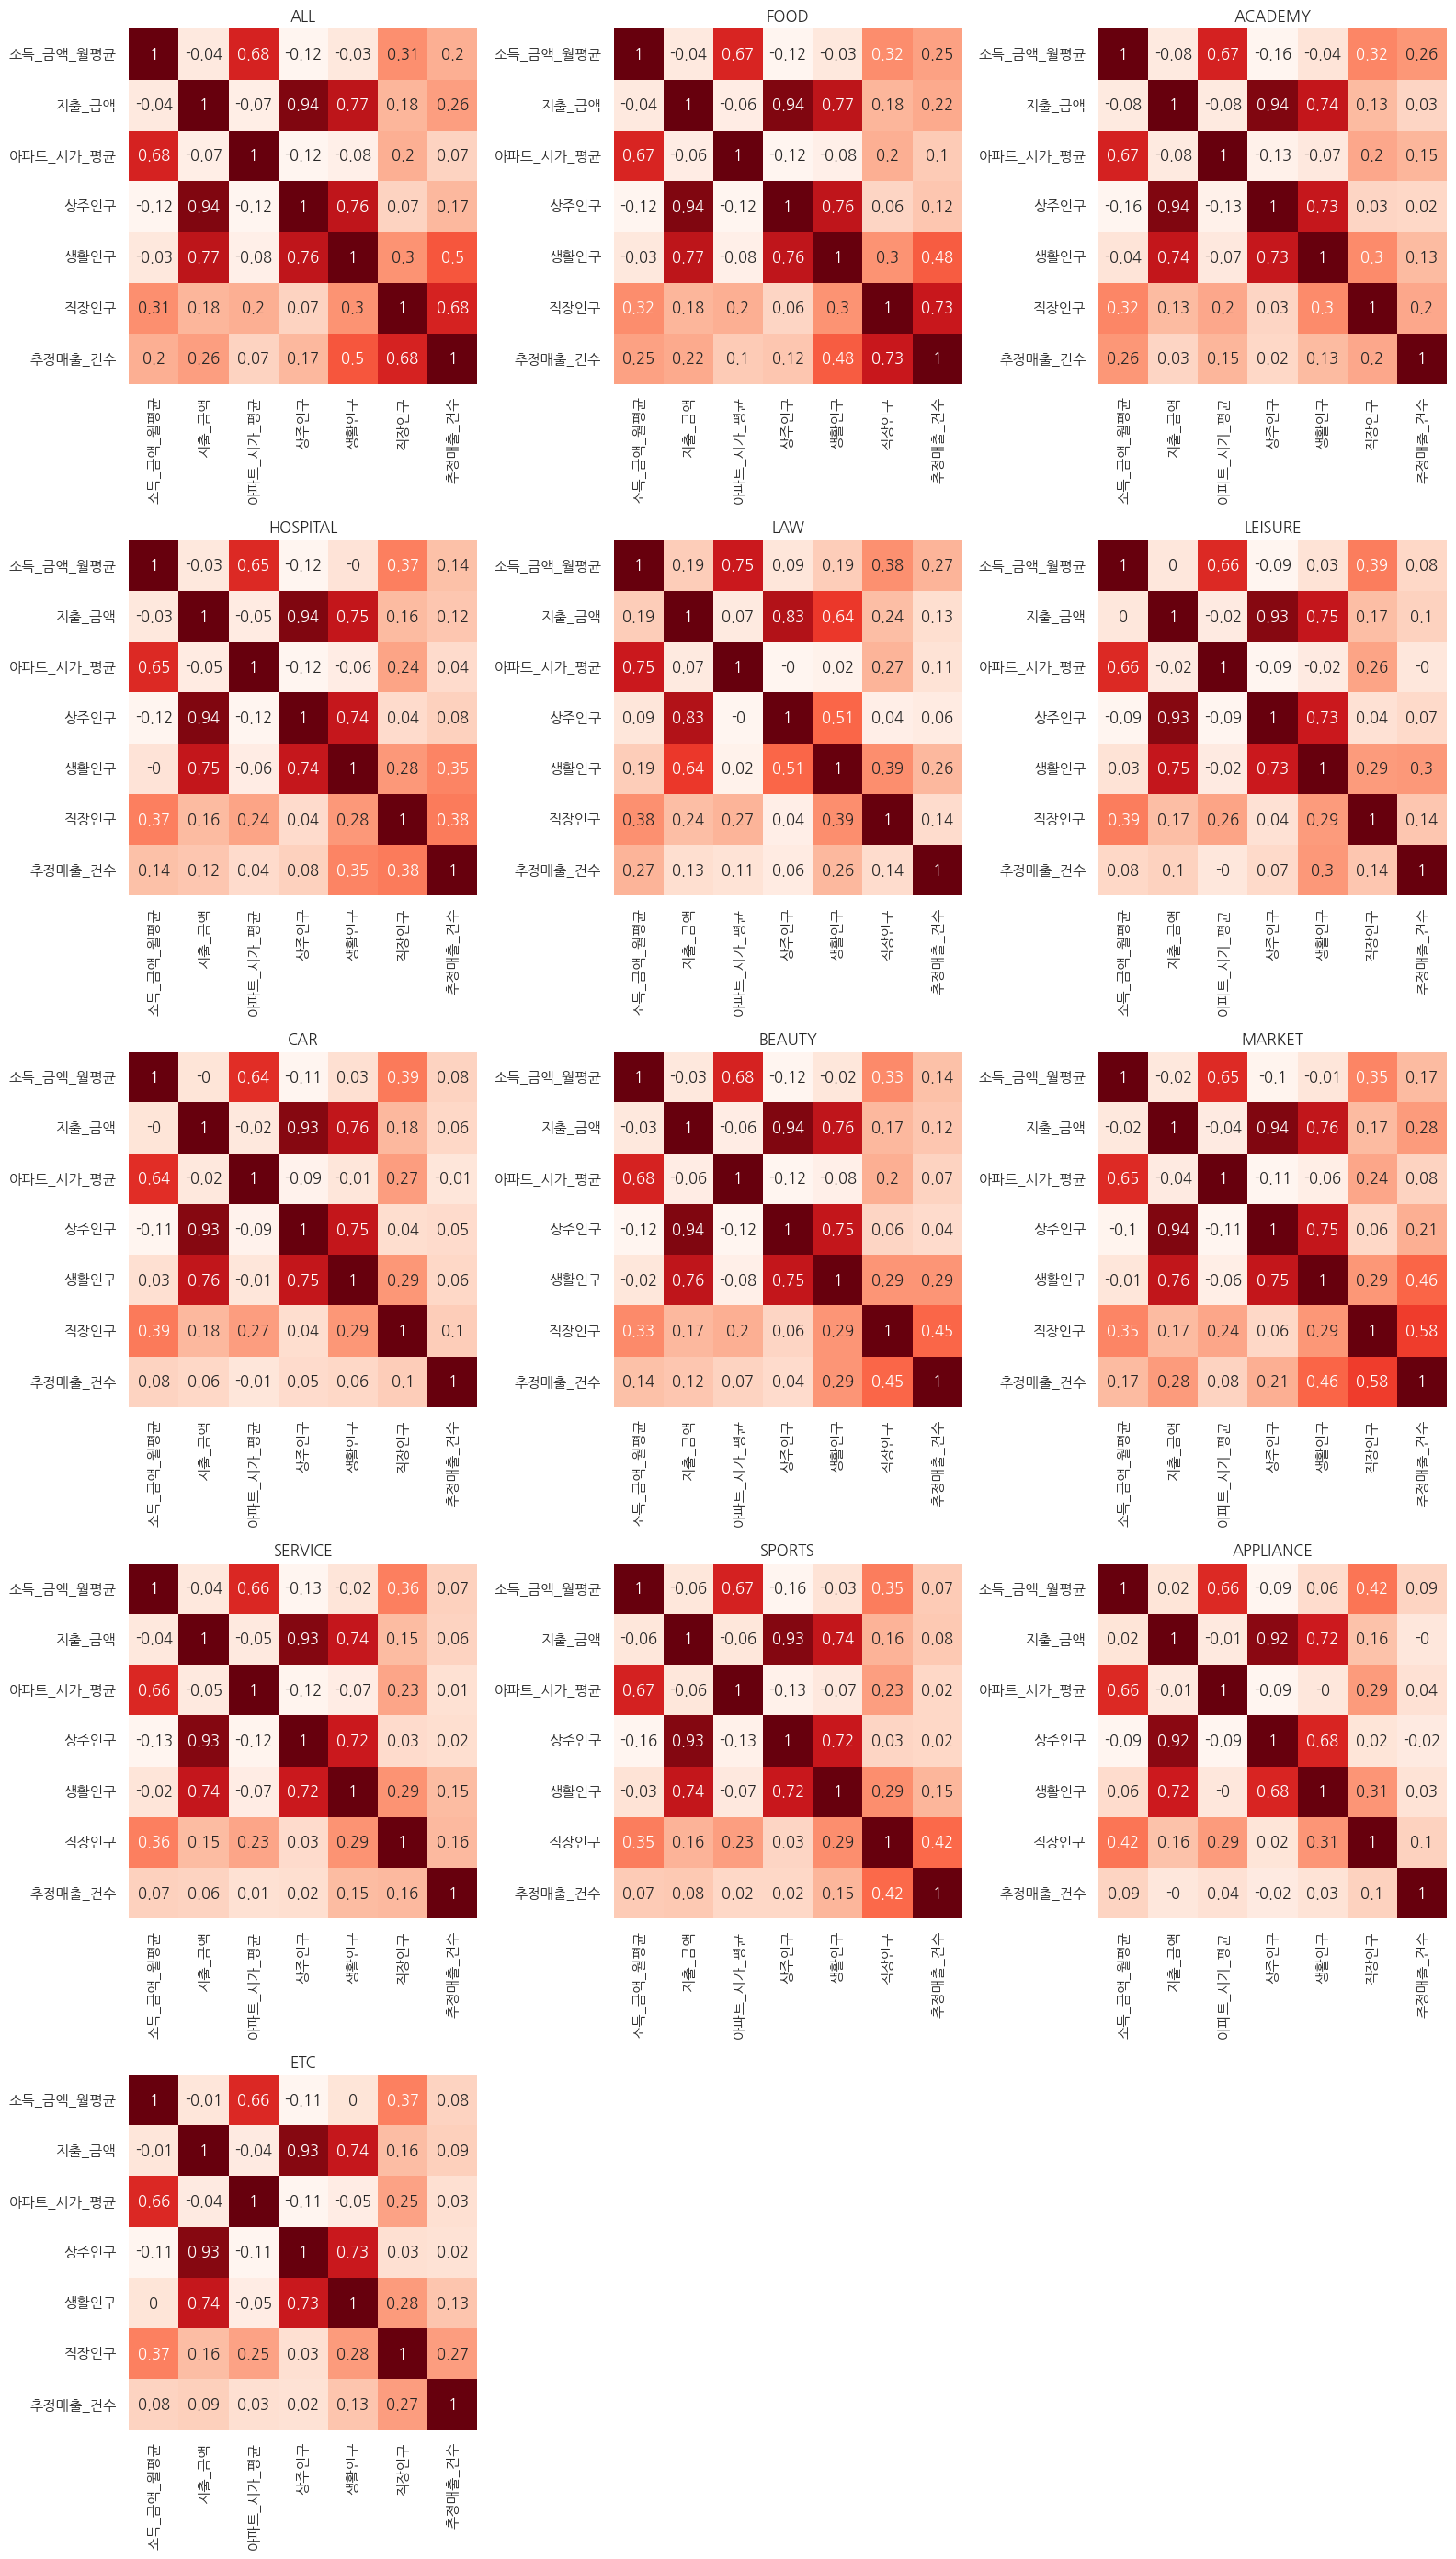

In [52]:
fig = plt.figure(figsize = (16, 28))

for i in range(len(data.PARSEDLIST)):
    df = pd.read_csv(data.PARSEDLIST[i])
    corr = round(df[variable.FEATURE + variable.TARGET].corr(), 2)

    globals()[f"ax{i}"] = fig.add_subplot(5, 3, i+1)
    globals()[f"ax{i}"].set_title(f"{sector.NAMELIST[i]}")

    sns.set(
        font_scale = 1,
        font = "NanumGothic"
        )

    sns.heatmap(
        corr,
        cmap='Reds',
        annot = True,
        cbar = False
        )

fig.tight_layout()

plt.show()

# Y

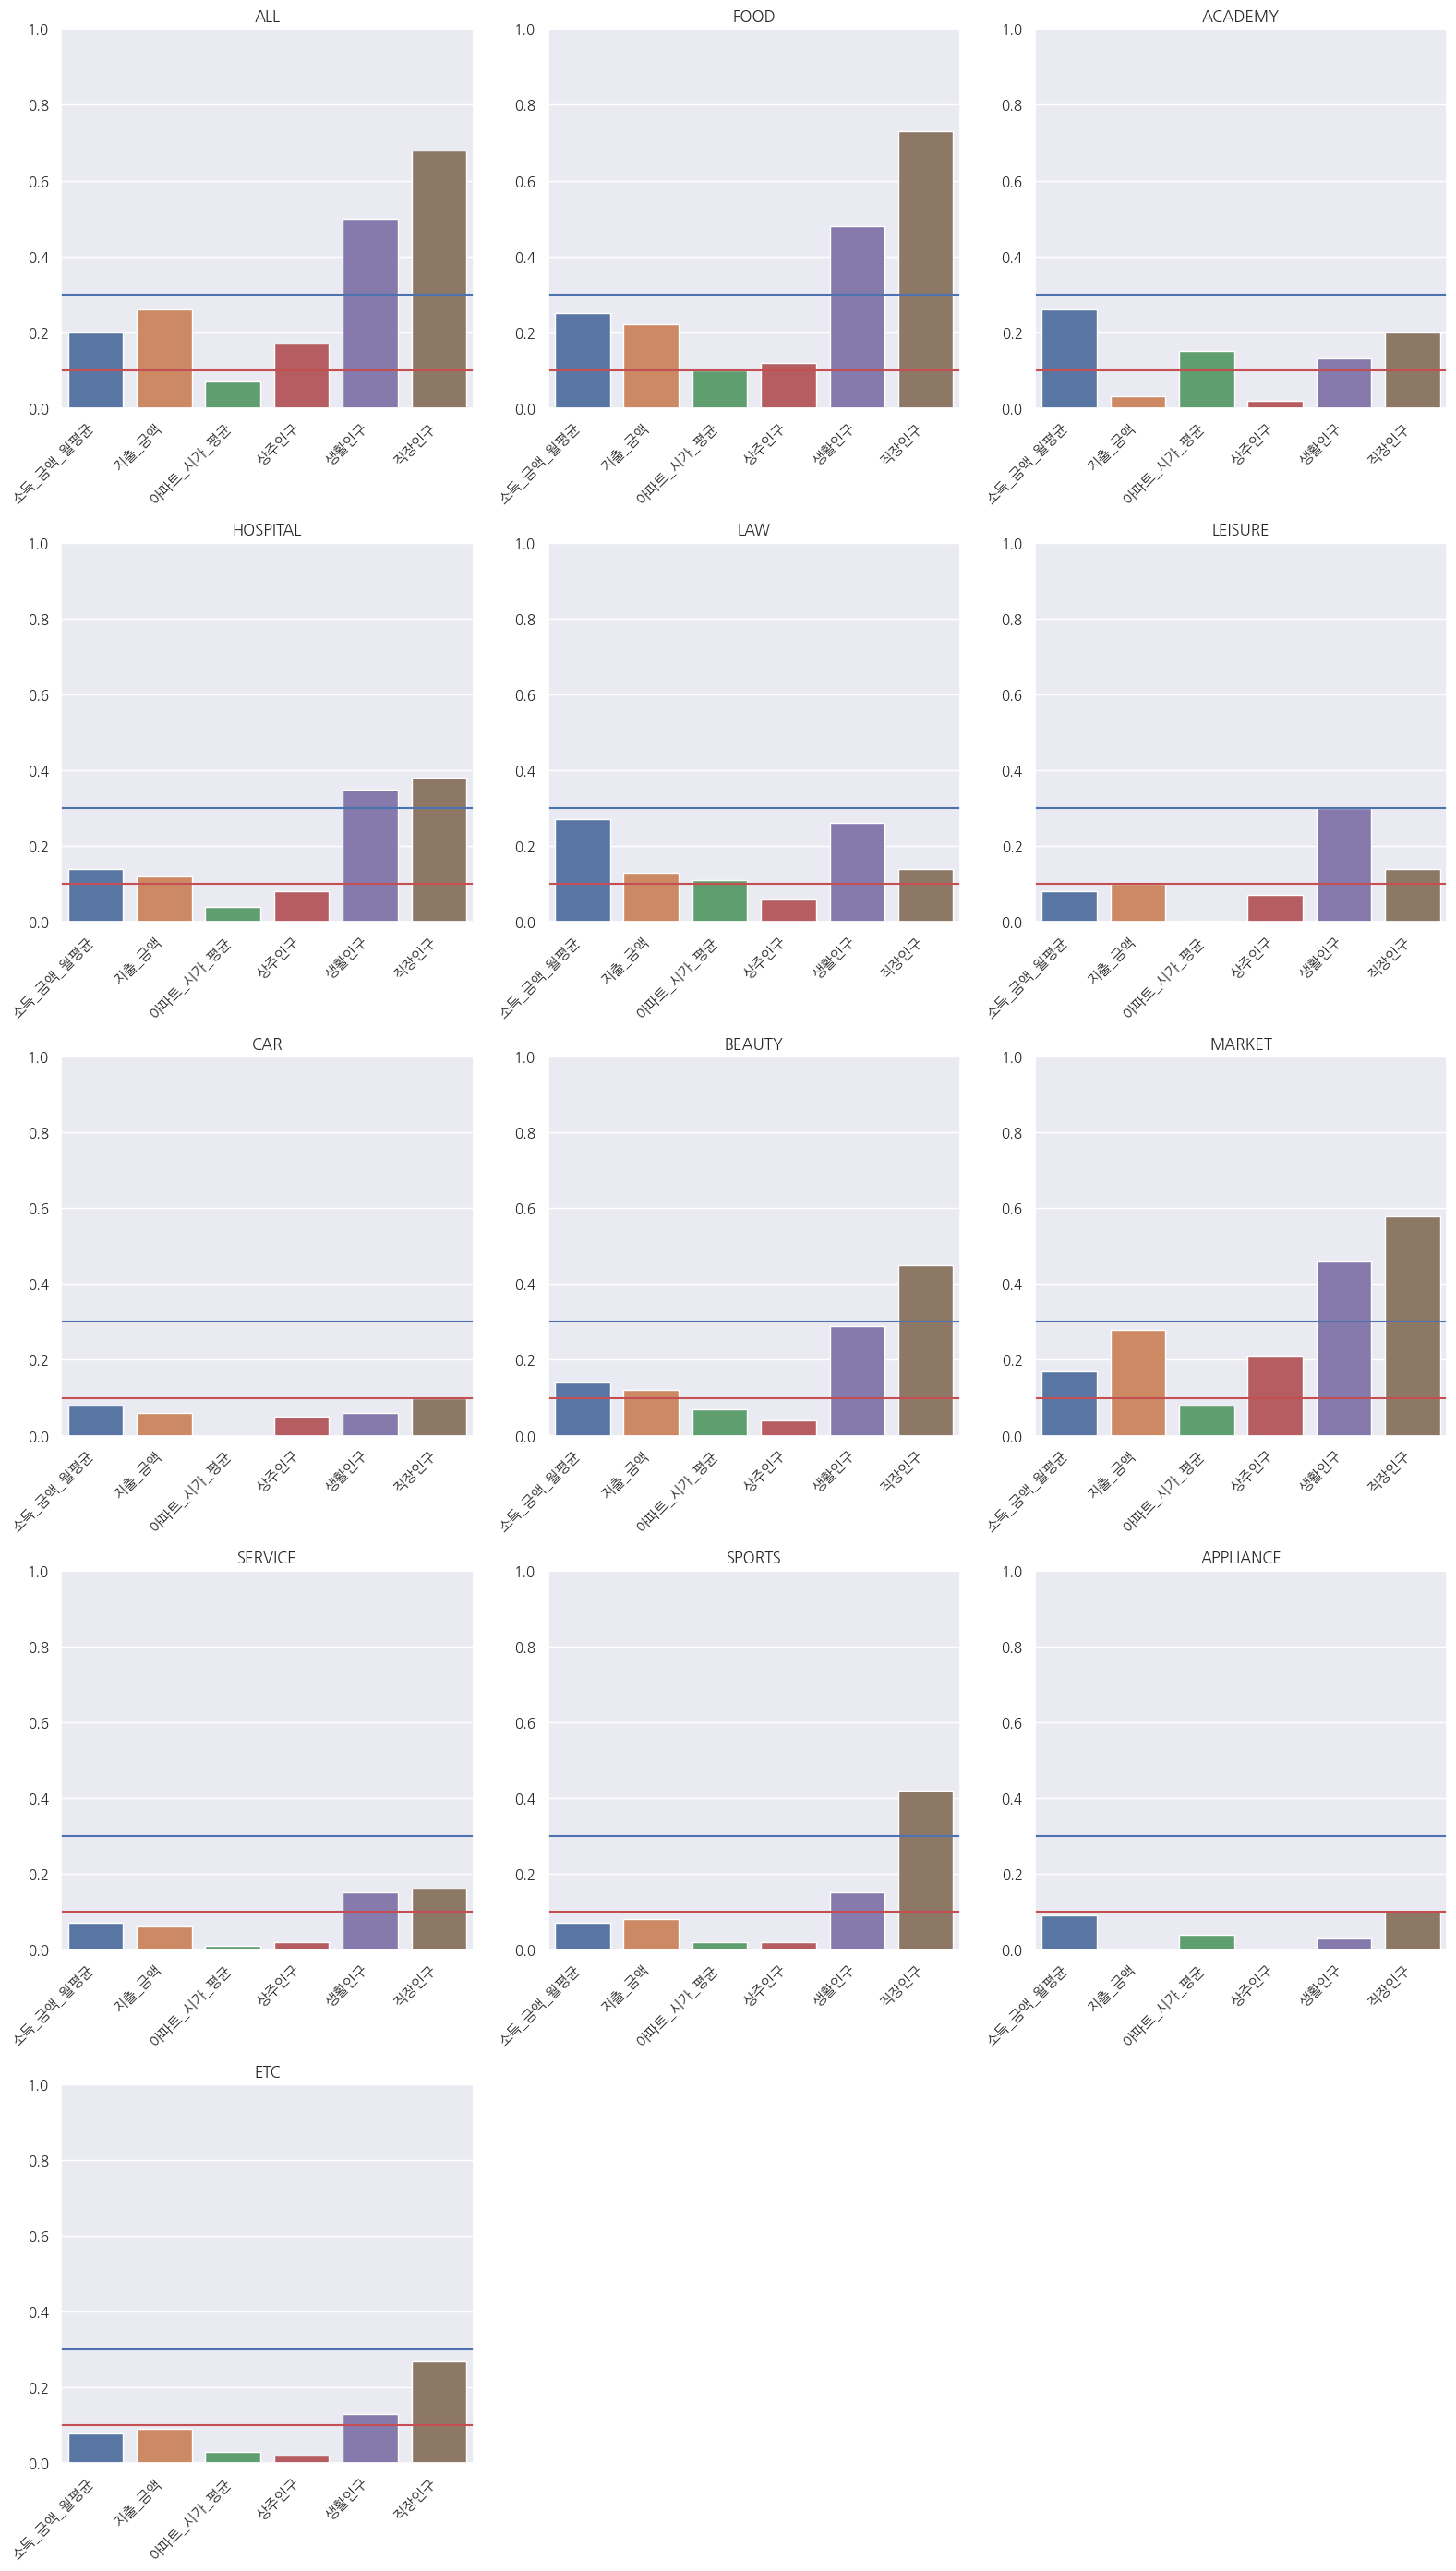

In [62]:
fig = plt.figure(figsize = (16, 28))

for i in range(len(data.PARSEDLIST)):
    df = pd.read_csv(data.PARSEDLIST[i])
    corr = round(df[variable.FEATURE + variable.TARGET].corr(), 2)
    y_corr = corr.loc['추정매출_건수', :'직장인구']

    globals()[f"ax{i}"] = fig.add_subplot(5, 3, i+1)

    globals()[f"ax{i}"].set_title(f"{sector.NAMELIST[i]}")

    globals()[f"ax{i}"].set_ylim(0, 1)
    globals()[f"ax{i}"].set_xticklabels(
        globals()[f"ax{i}"].get_xticks(),
        rotation = 45,
        ha = 'right'
        )

    globals()[f"ax{i}"].axhline(y=0.1, color='r', linestyle='-', label='None')
    globals()[f"ax{i}"].axhline(y=0.3, color='b', linestyle='-', label='Weak')

    sns.set(
        font_scale = 1,
        font = "NanumGothic"
        )

    sns.barplot(
        x = y_corr.keys(),
        y = y_corr.values
        )

fig.tight_layout()

plt.show()

# X Distribution

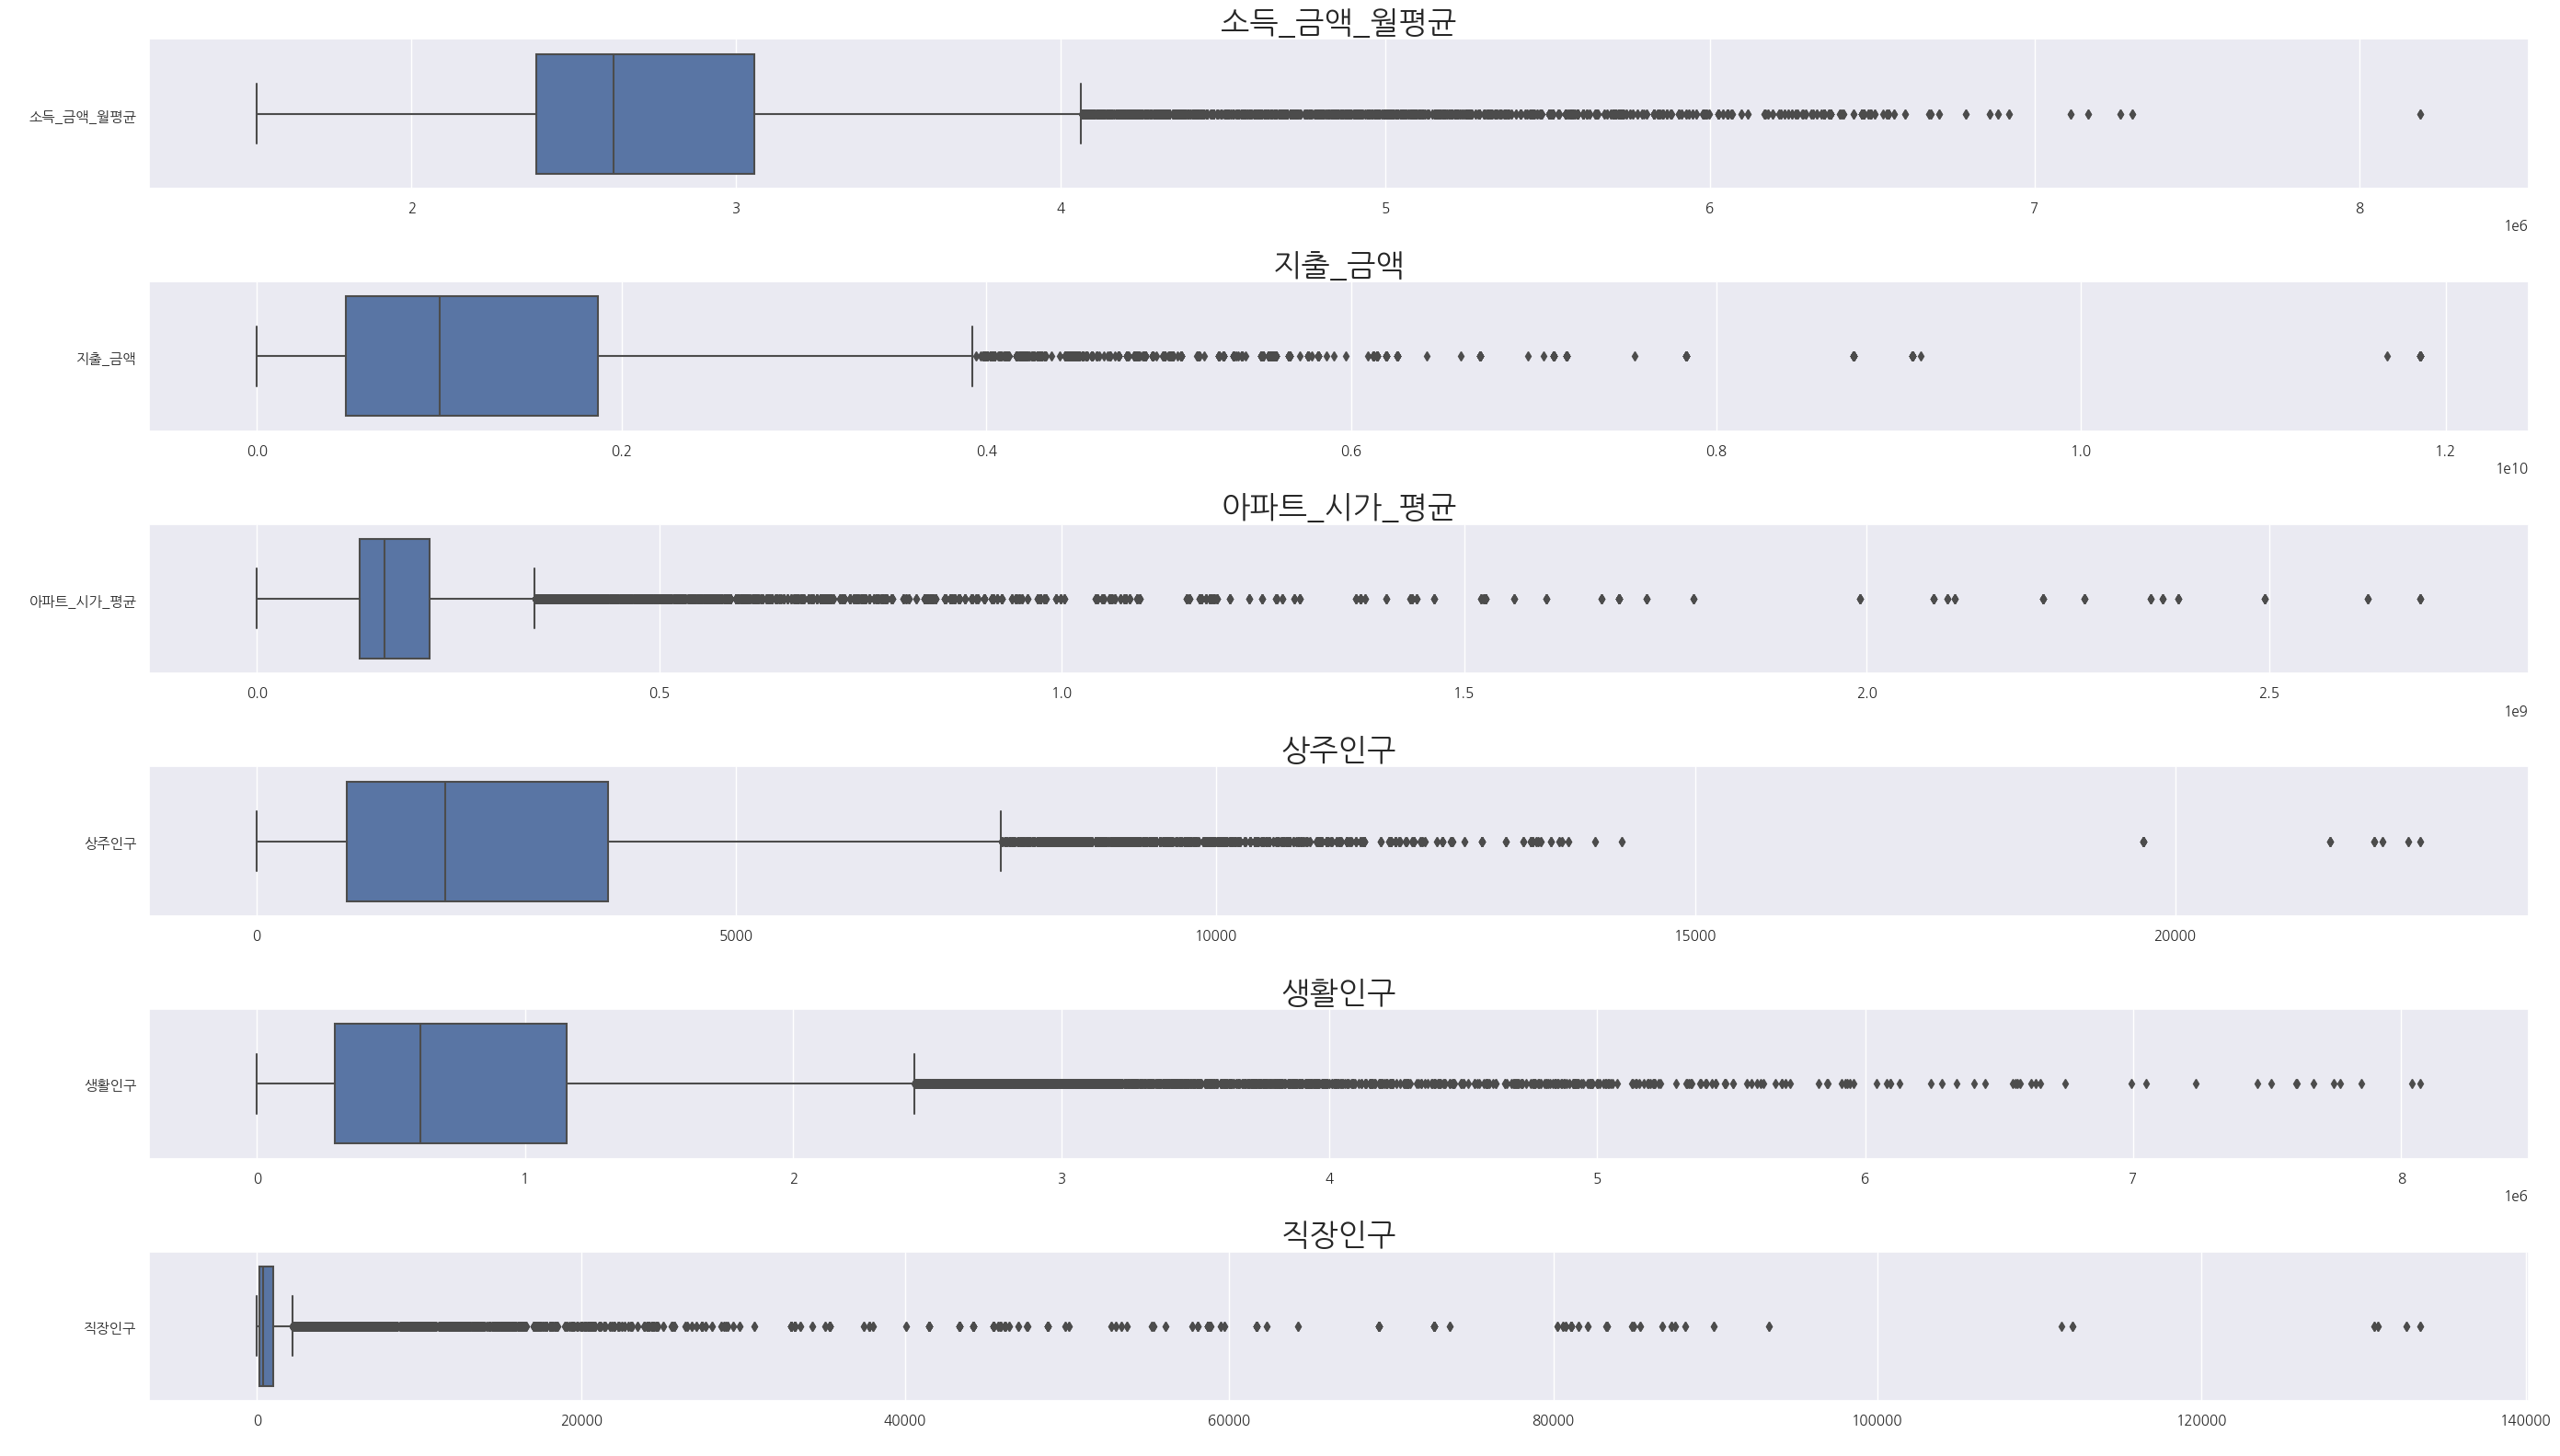

In [63]:
df = pd.read_csv(data.PARSEDLIST[0])

fig = plt.figure(figsize = (28, 16))

for i in range(len(variable.FEATURE)):
    globals()[f"ax{i}"] = fig.add_subplot(6, 1, i+1)

    sns.set(
        font_scale = 1,
        font = "NanumGothic"
        )

    sns.boxplot(
        data = df[[variable.FEATURE[i]]].melt(),
        x = 'value',
        y = 'variable'
        )

    globals()[f"ax{i}"].set_title(
        f"{variable.FEATURE[i]}",
        fontsize = 24
        )
    globals()[f"ax{i}"].set_xlabel(' ')
    globals()[f"ax{i}"].set_ylabel(' ')

fig.tight_layout()

plt.show()